# Day 6

[Probably a Fire Hazard](https://adventofcode.com/2015/day/6)

Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.

Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at 0,0, 0,999, 999,999, and 999,0. The instructions include whether to turn on, turn off, or toggle various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like 0,0 through 2,2 therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

    turn on 0,0 through 999,999 would turn on (or leave on) every light.
    toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
    turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.

After following the instructions, how many lights are lit?

In [7]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import product
from pathlib import Path

input_file = Path('input/day 06.txt')

The number of lights that are on:
377891


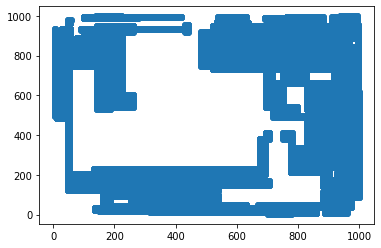

In [10]:
display = defaultdict(int)
parse = re.compile(r'(turn on|turn off|toggle) (\d{1,3},\d{1,3}) through (\d{1,3},\d{1,3})', re.I)

for line in open('input/day 06.txt'):
    command, point1, point2 = parse.findall(line)[0]
    x1, y1 = [int(n) for n in point1.split(',')]
    x2, y2 = [int(n) for n in point2.split(',')]
    
    for x,y in product(range(x1, x2 + 1), range(y1, y2 + 1)):
        if command == 'turn on':
            display[(x, y)] = 1
        elif command == 'turn off':
            display[(x, y)] = 0
        elif command == 'toggle':
            display[(x, y)] += 1
            
# count the lights that have been turned on or toggled 
lights_on = [k for k in display if display[k] % 2 == 1]
x = [point[0] for point in lights_on]
y = [point[1] for point in lights_on]
plt.scatter(x, y)

print('The number of lights that are on:')
print(len(lights_on))

## Part 2

You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish.

The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero.

The phrase turn on actually means that you should increase the brightness of those lights by 1.

The phrase turn off actually means that you should decrease the brightness of those lights by 1, to a minimum of zero.

The phrase toggle actually means that you should increase the brightness of those lights by 2.

What is the total brightness of all lights combined after following Santa's instructions?

For example:

    turn on 0,0 through 0,0 would increase the total brightness by 1.
    toggle 0,0 through 999,999 would increase the total brightness by 2000000.



In [12]:
display = defaultdict(int)
parse = re.compile(r'(turn on|turn off|toggle) (\d{1,3},\d{1,3}) through (\d{1,3},\d{1,3})', re.I)

for line in open('input/day 06.txt'):
    command, point1, point2 = parse.findall(line)[0]
    x1, y1 = [int(n) for n in point1.split(',')]
    x2, y2 = [int(n) for n in point2.split(',')]
    
    for x,y in product(range(x1, x2 + 1), range(y1, y2 + 1)):
        if command == 'turn on':
            display[(x, y)] += 1
        elif command == 'turn off':
            display[(x, y)] = max(0, display[(x, y)] - 1)
        elif command == 'toggle':
            display[(x, y)] += 2

print('The total brightness of the display is:')
print(sum(display.values()))

The total brightness of the display is:
14110788
